# 1. Preparar los datos para aplicar algoritmos de ML
## 1.1 Importamos las librerias que vamos a necesitar




In [1]:
import sys #only needed to determine Python version number

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + mpl.__version__)

Python version 2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Pandas version 0.19.2
Matplotlib version 2.0.0


In [2]:
# Realizamos la lectura del fichero y incluimos en el fichero el nombre de las columnas
names_features = [
'age',             # Edad del individuo: [17 - 90] media 38, 
'type_employer',   # Tipo de trabajo : [ State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, ?, Self-emp-inc, Without-pay, Never-worked ]
'fnlwgt',          # Numero de personas encuestadas
'education',       # Nivel mas alto de educacion para el individuo
'education-num',   # Nivel mas alto de educacion en forma numerica [1 - 16]
'marital-status',  # Estado civil de la persona: [ Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed ]
'occupation',      # Ocupacion de la persona: [ Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, ?, Protective-serv, Armed-Forces, Priv-house-serv']
'relationship',    # Relacion familiar: [ Not-in-family, Husband, Wife, Own-child, Unmarried, Other-Relative]
'race',            # Raza de un individuo: [ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other ]
'sex',             # Sexo de un individuo : [ Male, Female]
'capital_gain',    # Ganancias de capital : [ 0 - 99999 ]
'capital_loss',    # Perdidas de caapital : [ 0 - 4356 ]
'hours-per-week',  # Horas trabajadas por semana : [ 1 - 99 ]
'native-country',  # Pais de origen de la persona : [   ]
'income'           # Indica si una persona gana o no mas de 50.000        
]
df = pd.read_csv('adult.txt' , header=None, names=names_features)
df.head(3)
print("ok")

ok


In [5]:
columna_unica = df['native-country'].unique()

In [3]:
# Obtenemos las edades de las personas
edad = df['age']

# Hacemos una b usqueda con las edades que pertenezcan a un rango
edad.where( edad < 30 ).where( edad > 18).count()
print('ok')
#",".join(ocupacion )

ok


# • Mapea los países en grupos
  Agrupamos las personas por ciudad, Las que son de EEUU en uno y los que no son de EEUU en otro

In [3]:
def isEEUU(x):
     
    if x == ' United-States':
        return 1
    else :
        return 0
  
# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_isEEUU = df["native-country"].apply(isEEUU)

# Cramos la nueva columna enum_isEEUU con los datos anteriores
df["enum_isEEUU"] = enum_isEEUU    
print('ok')

ok


# • Mapeamos las razas

In [4]:
def raceToNumber(x):
     
    if x == ' Amer-Indian-Eskimo':
        return 0
    if x == ' Asian-Pac-Islander':
        return 1
    if x == ' Black':
        return 2
    if x == ' Other':
        return 3
    if x == ' White':
        return 4
    
# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_razas = df["race"].apply(raceToNumber)

# Cramos la nueva columna enum_razas con los datos anteriores
df["enum_razas"] = enum_razas
print('ok')

ok


# • Mapea el tipo de trabajo

In [5]:
def type_employerToNumber(x):
     
    if x.strip() == 'State-gov':
        return 0
    if x.strip() == 'Self-emp-not-inc':
        return 1
    if x.strip() == 'Private':
        return 2
    if x.strip() == 'Federal-gov':
        return 3
    if x.strip() == 'Local-gov':
        return 4
    if x.strip() == 'Self-emp-inc':
        return 5
    if x.strip() == 'Without-pay':
        return 6
    if x.strip() == 'Never-worked':
        return 7
    if x.strip() == '?':
        return 8
    
# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_type_employer = df["type_employer"].apply(type_employerToNumber)

# Cramos la nueva columna enum_razas con los datos anteriores
df["enum_type_employer"] = enum_type_employer
print('ok')

ok


# •  Mapea el tipo de familia

In [6]:
def relationshipToNumber(x):
     
    if x.strip() == 'Not-in-family':
        return 0
    if x.strip() == 'Husband':
        return 1
    if x.strip() == 'Wife':
        return 2
    if x.strip() == 'Own-child':
        return 3
    if x.strip() == 'Unmarried':
        return 4
    if x.strip() == 'Other-relative':
        return 5
    
# Aplicamos una funcion a la columna, para convertir los valores en enumerados
enum_relationship = df["relationship"].apply(relationshipToNumber)

# Cramos la nueva columna enum_razas con los datos anteriores
df["enum_relationship"] = enum_relationship
print('ok')

ok


# 2. Haz visualizaciones de diferentes valores con seaborn.
Describe lo que ves en las visualizaciones

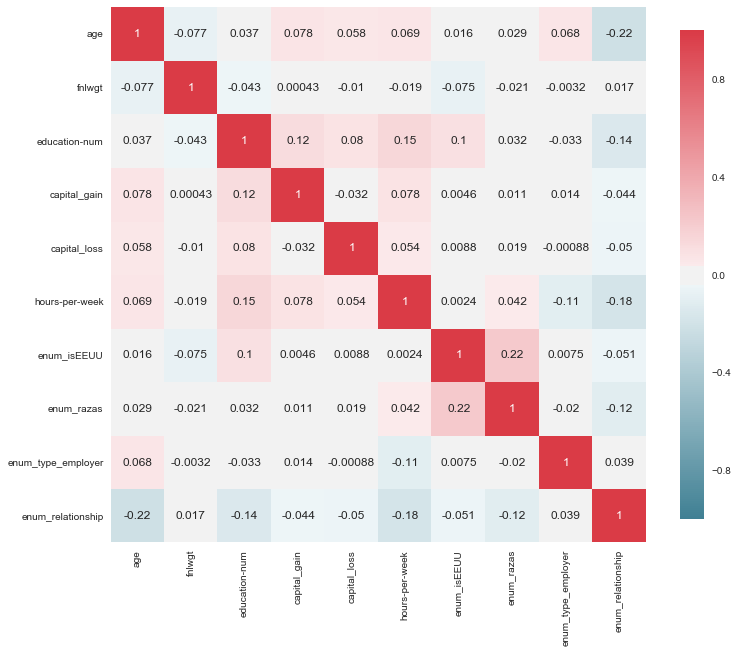

In [7]:
'''
2.2 Funcion que muestra la correlacion entre todas las features
'''
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

plot_correlation_map( df )

# 4. Utiliza random forest con diferentes parámetros, diferentes features, y cross_validation para conseguir el mejor modelo posible.

In [22]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# modelo
modelo_svm = RandomForestClassifier(n_estimators = 15)

# Seleccionamos las features con las que vamos a usar el algoritmo
features = ["enum_razas","enum_type_employer","education-num","capital_gain","capital_loss","enum_relationship"]

X = df[features]
y = df["enum_isEEUU"]  # targets


#SCORE
scores = cross_val_score(modelo_svm, X, y, cv = 5)
print(scores.mean())


0.913086230676


In [23]:
RandomForestClassifier?



(32561, 15)